### This project is a group assignment carried out to evaluate the knowledge of the General Public on the Impact of Climate Change on Emerging Infectious Diseases

#### The data were obtained by questionnaire sampling.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import sem
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

### DATA CLEANING

In [81]:
df=pd.read_excel("Survey.xlsx")

df.head()

,Gender,Country,Age,Education,Background,Occupation,Field,The climate has been changing in the past years,Human activities have contributed to climate change,Which of the following are the main drivers of climate change?\nSelect all that apply.,...,Exposure to ultraviolet (UV) lights increases the chance of getting infectious diseases.,Increases in sea level can increase the spread of infectious disease.,Exposure to the constant internet network increases the chance of getting infectious diseases.,Increase in the precipitation (rainfalls) affects the spread of infectious disease.,Changes in temperature levels affect the spread of infectious disease.,Deforestation can cause emerging diseases (newly appeared diseases or diseases that were available but are rapidly changing in incidence).,Flooding prevents the spread of infectious diseases,Changes in humidity levels can affect the spread of infectious diseases,Where do you mainly get the most common information on climate change??,"If others, specify:...."
0,Male,Azerbaijan,41,PG,Veterinary,Veterinarian,Life science,True,True,"Burning fossil fuels, Carbon emission",...,True,True,False,True,True,True,False,True,"Internet and social media, Television programs...",NaN
1,Male,Azerbaijan,45,PhD,Microbiol8gy,Lectuter,Life science,True,True,"Burning fossil fuels, Carbon emission, Increas...",...,False,True,False,True,I don't know,True,False,True,"Internet and social media, Books and newspaper...",NaN
2,Female,Azerbaijan,33,Masters,Biology,Teacher,Life science,True,True,"Burning fossil fuels, Carbon emission, Utiliza...",...,True,I don't know,False,True,True,True,I don't know,True,"Internet and social media, Television programs...",NaN
3,Male,Azerbaijan,29,Masters,Microbiology,Researcher,Life science,True,True,Carbon emission,...,True,True,I don't know,True,True,True,True,True,"Internet and social media, Educational program...",NaN
4,Female,Bangladesh,27,Masters,Biology,Student,Life science,True,True,"Burning fossil fuels, Carbon emission, Increas...",...,False,I don't know,False,I don't know,True,True,False,True,"Internet and social media, Television programs...",NaN


##### Rename the columns to become more readable

In [181]:
df.shape

(231, 30)

In [82]:
df.columns

Index(['Gender', 'Country', 'Age', 'Education', 'Background', 'Occupation',
       'Field', 'The climate has been changing in the past years',
       ' Human activities have contributed to climate change',
       'Which of the following are the main drivers of climate change?\nSelect all that apply.',
       'What are the effects of climate change?\nSelect all that apply.',
       'Which of the following are infectious diseases?\nSelect all that apply',
       'Which of the the following diseases outbreaks you have heard about\nSelect all that apply',
       'What risk factors are associated with getting an infectious disease?\nSelect all that apply',
       'Disease transmission can occur via:\nSelect all that apply',
       'The emergence of infectious diseases can be linked to the climate change.',
       'Exposure to ultraviolet (UV) lights increases the chance of getting infectious diseases. ',
       'Increases in sea level can increase the spread of infectious disease.',
       

In [83]:
df.rename(columns={"The climate has been changing in the past years":"Q1",
                  ' Human activities have contributed to climate change':"Q2",
                  'Which of the following are the main drivers of climate change?\nSelect all that apply.':"Q3",
                  'What are the effects of climate change?\nSelect all that apply.':"Q4",
                  'Which of the following are infectious diseases?\nSelect all that apply':'Q5',
                  'Which of the the following diseases outbreaks you have heard about\nSelect all that apply':'Q6',
                  'What risk factors are associated with getting an infectious disease?\nSelect all that apply':"Q7",
                  "Disease transmission can occur via:\nSelect all that apply":"Q8",
                  "The emergence of infectious diseases can be linked to the climate change.":'Q9',
                  'Exposure to ultraviolet (UV) lights increases the chance of getting infectious diseases. ':"Q10",
                  'Increases in sea level can increase the spread of infectious disease.':"Q11",
                  'Exposure to the constant internet network increases the chance of getting infectious diseases.':"Q12",
                  'Increase in the precipitation (rainfalls) affects the spread of infectious disease.':"Q13",
                  'Changes in temperature levels affect the spread of infectious disease.':"Q14",
                  'Deforestation can cause emerging diseases (newly appeared diseases or diseases that were available but are rapidly changing in incidence). ':"Q15",
                  'Flooding prevents the spread of infectious diseases':"Q16",
                  'Changes in humidity levels can affect the spread of infectious diseases':"Q17",
                  'Where do you mainly get the most common information on climate change??':'Q18',
                  'If others, specify:....':'Q19'},inplace=True)

In [84]:
df.head()

,Gender,Country,Age,Education,Background,Occupation,Field,Q1,Q2,Q3,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,Male,Azerbaijan,41,PG,Veterinary,Veterinarian,Life science,True,True,"Burning fossil fuels, Carbon emission",...,True,True,False,True,True,True,False,True,"Internet and social media, Television programs...",NaN
1,Male,Azerbaijan,45,PhD,Microbiol8gy,Lectuter,Life science,True,True,"Burning fossil fuels, Carbon emission, Increas...",...,False,True,False,True,I don't know,True,False,True,"Internet and social media, Books and newspaper...",NaN
2,Female,Azerbaijan,33,Masters,Biology,Teacher,Life science,True,True,"Burning fossil fuels, Carbon emission, Utiliza...",...,True,I don't know,False,True,True,True,I don't know,True,"Internet and social media, Television programs...",NaN
3,Male,Azerbaijan,29,Masters,Microbiology,Researcher,Life science,True,True,Carbon emission,...,True,True,I don't know,True,True,True,True,True,"Internet and social media, Educational program...",NaN
4,Female,Bangladesh,27,Masters,Biology,Student,Life science,True,True,"Burning fossil fuels, Carbon emission, Increas...",...,False,I don't know,False,I don't know,True,True,False,True,"Internet and social media, Television programs...",NaN


In [85]:
#checking the dataframe for null values
df.isna().sum()
#only one row in Field has a null value, dropping it

Gender          0
Country         0
Age             0
Education       0
Background      0
Occupation      0
Field           1
Q1              0
Q2              0
Q3              0
Q4              0
Q5              0
Q6              0
Q7              0
Q8              0
Q9              0
Q10             0
Q11             0
Q12             0
Q13             0
Q14             0
Q15             0
Q16             0
Q17             0
Q18             0
Q19           225
dtype: int64

In [86]:
df.drop(231,inplace=True)

In [87]:
#cleaning the country column
df.Country.unique()

array(['Azerbaijan', 'Bangladesh ', 'Eritrea', 'Ethiopia', 'Finland ',
       'Germany', 'Ireland ', 'Italy', 'Italy ', 'Kenya ', 'Kenya',
       'Nepal', 'Netherlands', 'Nigeria', 'Russia', 'South African ',
       'Spain', 'Tanzania', 'Turkey', 'Uganda', 'USA ', 'Bolivia',
       'France', 'Germany ', 'Pakistan ', 'Rwanda', 'United Kingdom',
       'United Kingdom '], dtype=object)

In [88]:
df["Country"]=df["Country"].str.strip()

In [89]:
df['Country']=df["Country"].replace({"South African":"South Africa"})

In [90]:
df["Country"].unique()

array(['Azerbaijan', 'Bangladesh', 'Eritrea', 'Ethiopia', 'Finland',
       'Germany', 'Ireland', 'Italy', 'Kenya', 'Nepal', 'Netherlands',
       'Nigeria', 'Russia', 'South Africa', 'Spain', 'Tanzania', 'Turkey',
       'Uganda', 'USA', 'Bolivia', 'France', 'Pakistan', 'Rwanda',
       'United Kingdom'], dtype=object)

In [91]:
df["Education"].unique()

array(['PG', 'PhD', 'Masters', 'Bachelors', 'MD', 'Intern', 'High School',
       'HND', 'Diploma', 'Diploma ', 'DIPLOMA ', 'Certificate '],
      dtype=object)

In [92]:
#for the sake of analysis, we split the Educational level into; Post-Graduate, Undergraduate and Others
#Post-Graduate: PG, PhD, Masters
#Bachelors: Bachelors, MD, HND, Diploma, Certificate
#Others: Intern, High School

def education (df):
    if "PG" in df:
        return ("Post-Graduate")
    elif "PhD" in df:
        return ("Post-Graduate")
    elif "Masters" in df:
        return ("Post-Graduate")
    elif "Bachelors" in df:
        return ("Bachelors")
    elif "MD" in df:
        return ("Bachelors")
    elif "Intern" in df:
        return ("Others")
    elif "High School" in df:
        return ("Others")
    elif "HND" in df:
        return ("Bachelors")
    elif "Diploma" in df:
        return ("Bachelors")
    elif "Diploma " in df:
        return ("Bachelors")
    elif "DIPLOMA" in df:
        return ("Bachelors")
    elif "Certificate " in df:
        return ("Others")
df["Education"]=df["Education"].map(education)

In [93]:
df["Education"].value_counts()

Bachelors        153
Post-Graduate     69
Others             9
Name: Education, dtype: int64

In [94]:
#since most of the responses are true or false, we decided to convert to str so we can compute the scores 

In [95]:
df.iloc[:,7:]=df.iloc[:,7:].astype(str)

#### Score Guide:
##### For every correct answer, each respondents gets +1 and -0.5 if he selects the wrong answer or does not pick the right answer.
##### Where the respondents picks "I don't Know", he gets 0 and is not penalized

In [96]:
# Define the function to code "True" as 1, "False" as -0.5, and "I don't know" as 0

def coding (df):
    if "True" in df:
        return (1)
    elif "False" in df:
        return (-0.5)
    else:
        return (0)

In [97]:
df["Q1"]=df["Q1"].map(coding)

In [98]:
df["Q2"]=df["Q2"].map(coding)

In [99]:
#Q3 is involves selecting multiple options, for every right option selected,he scores +1 or -0.5 for every wrong choice
# or no right choice selected

In [100]:
# to score the responses to Q3
def scoring (df):
    answer=0
    if "Burning fossil fuels" in df:
        answer+=1
    elif "Burning fossil fuels" not in df:
        answer-=0.5
    if "Carbon emission" in df:
        answer+=1
    elif "Carbon emission" not in df:
        answer-=0.5
    if "Increase in animal biodiversity" in df:
        answer-=0.5
    elif "Increase in animal biodiversity" not in df:
        answer+=1
    if "Farming of livestock" in df:
        answer+=1
    elif "Farming of livestock" not in df:
        answer-=0.5
    if "Use of solar panels" in df:
        answer -=0.5
    elif "Use of solar panels" not in df:
        answer+=1
    if "Utilization of automobiles" in df:
        answer+=1
    elif "Utilization of automobiles" not in df:
        answer-=0.5
    return answer

In [101]:
df["Q3"]=df["Q3"].map(scoring)

In [102]:
#to score the responses for Q4
def scoring_4 (df):
    answer=0
    if "Melting of ices" in df:
        answer+=1
    elif "Melting of ices" not in df:
        answer-=0.5
    if "Increase in flooding" in df:
        answer+=1
    elif "Increase in flooding" not in df:
        answer-=0.5
    if "Urbanization" in df:
        answer-=0.5
    elif "Urbanization" not in df:
        answer+=1
    if "Increase of forest fires" in df:
        answer+=1
    elif "Increase of forest fires" not in df:
        answer-=0.5
    if "Increase of human welfare" in df:
        answer-=0.5
    elif "Increase of human welfare" not in df:
        answer+=1
    if "Greenhouse effect" in df:
        answer+=1
    elif "Greenhouse effect" not in df:
        answer-=0.5
    return answer

In [103]:
df["Q4"]=df["Q4"].map(scoring_4)

In [104]:
#to score the responses for Q5
def scoring_5 (df):
    answer=0
    if "Asthma" in df:
        answer-=0.5
    elif "Asthma" not in df:
        answer+=1
    if "Diabetes" in df:
        answer-=0.5
    elif "Diabetes" not in df:
        answer+=1
    if "Human Immunodeficiency Virus (HIV)" in df:
        answer+=1
    elif "Human Immunodeficiency Virus (HIV)" not in df:
        answer-=0.5
    if "Lyme disease" in df:
        answer+=1
    elif "Lyme disease" not in df:
        answer-=0.5
    if "Malaria" in df:
        answer+=1
    elif "Malaria" not in df:
        answer-=0.5
    if "Obesity" in df:
        answer-=0.5
    elif "Obesity" not in df:
        answer+=1
    if "Parkinson's disease" in df:
        answer-=0.5
    elif "Parkinson's disease" not in df:
        answer+=1
    if "Tuberculosis" in df:
        answer+=1
    elif "Tuberculosis" not in df:
        answer-=0.5
    return answer

In [105]:
df["Q5"]=df["Q5"].map(scoring_5)

In [106]:
#we leave question 6 for analysis

In [107]:
#to score the responses for Q7
def scoring_7 (df):
    answer=0
    if "Insect bites" in df:
        answer+=1
    elif "Insect bites" not in df:
        answer-=0.5
    if "Dog bites" in df:
        answer+=1
    elif "Dog bites" not in df:
        answer-=0.5
    if "Smoking" in df:
        answer-=0.5
    elif "Smoking" not in df:
        answer+=1
    if "Drinking unclean water" in df:
        answer+=1
    elif "Drinking unclean water" not in df:
        answer-=0.5
    if "Eating undercooked food" in df:
        answer+=1
    elif "Eating undercooked food" not in df:
        answer-=0.5
    if "Not washing your hands often" in df:
        answer+=1
    elif "Not washing your hands often" not in df:
        answer-=0.5
    if "Having sexual intercourse" in df:
        answer+=1
    elif "Having sexual intercourse" not in df:
        answer-=0.5
    if "Sunbathing" in df:
        answer-=0.5
    elif "Sunbathing" not in df:
        answer+=1
    if "Breastfeeding" in df:
        answer+=1
    elif "Breastfeeding" not in df:
        answer-=0.5
    if "Blood transfusion" in df:
        answer+=1
    elif "Blood transfusion" not in df:
        answer-=0.5
    if "None of the above" in df:
        answer+=0
    return answer

In [108]:
df["Q7"]=df["Q7"].map(scoring_7)

In [109]:
#to score the responses for Q8
def scoring_8 (df):
    answer=0
    if "Mosquitoes" in df:
        answer+=1
    elif "Mosquitoes" not in df:
        answer-=0.5
    if "Sand flies" in df:
        answer+=1
    elif "Sand flies" not in df:
        answer-=0.5
    if "Butterflies" in df:
        answer-=0.5
    elif "Butterflies" not in df:
        answer+=1
    if "Bed bugs" in df:
        answer+=1
    elif "Bed bugs" not in df:
        answer-=0.5
    if "Bats" in df:
        answer+=1
    elif "Bats" not in df:
        answer-=0.5
    if "Ticks" in df:
        answer+=1
    elif "Ticks" not in df:
        answer-=0.5
    if "Wasps" in df:
        answer-=0.5
    elif "Wasps" not in df:
        answer+=1
    if "Fleas" in df:
        answer+=1
    elif "Fleas" not in df:
        answer-=0.5
    if "Wild animals" in df:
        answer+=1
    elif "Wild animals" not in df:
        answer-=0.5
    if "Pets" in df:
        answer+=1
    elif "Pets" not in df:
        answer-=0.5
    if "Farm animals" in df:
        answer+=1
    elif "Farm animals" not in df:
        answer-=0.5
    if "None of the above" in df:
        answer+=0
    return answer

In [110]:
df["Q8"]=df["Q8"].map(scoring_8)

In [111]:
df["Q9"]=df["Q9"].map(coding)

In [112]:
#Q10 is the reverse, we deduct 0.5 for true and give 1 for false
def coding_inverse (df):
    if "True" in df:
        return (-0.5)
    elif "False" in df:
        return (1)
    else:
        return 0

In [113]:
df["Q10"]=df["Q10"].map(coding_inverse)

In [114]:
df["Q11"]=df["Q11"].map(coding)
df["Q12"]=df["Q12"].map(coding_inverse)
df["Q13"]=df["Q13"].map(coding)
df["Q14"]=df["Q14"].map(coding)
df["Q15"]=df["Q15"].map(coding)
df["Q16"]=df["Q16"].map(coding_inverse)
df["Q17"]=df["Q17"].map(coding)

In [115]:
#sum up the scores skipping rows 6 and 18. convert the values to percentage

df["Total"]=df.iloc[:,7:].sum(axis=1,numeric_only=True)

In [116]:
df["Percent"]=(df["Total"]/52)*100

### DATA EXPLORATION

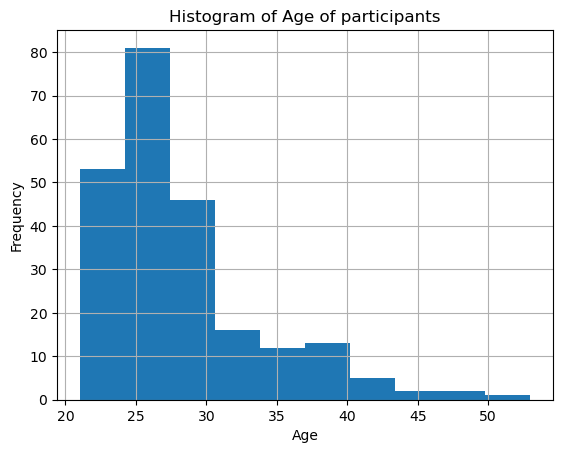

In [161]:
#checking the distribution of the age of the participants
#most of the participants are less than 30 years of age
df["Age"].hist()
plt.title("Histogram of Age of participants")
plt.xlabel("Age")
plt.ylabel("Frequency");

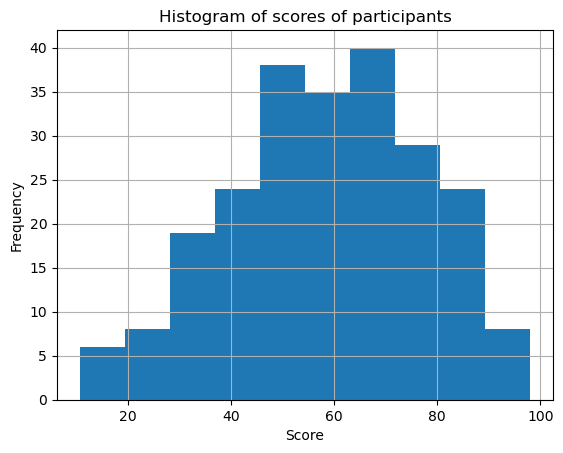

In [162]:
#checking the distribution of performance of the participants
df["Percent"].hist()
plt.title("Histogram of scores of participants")
plt.xlabel("Score")
plt.ylabel("Frequency");

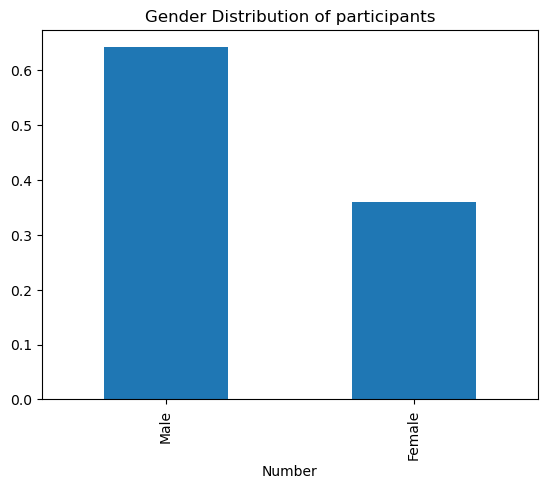

In [190]:
df['Gender'].value_counts(normalize=True).plot.bar()
plt.title("Gender Distribution of participants")
plt.xlabel("Number");

In [172]:
data=df.Country.value_counts().to_frame()
data.head()

,Country
Nigeria,70
Uganda,61
Ethiopia,38
Eritrea,27
Azerbaijan,8


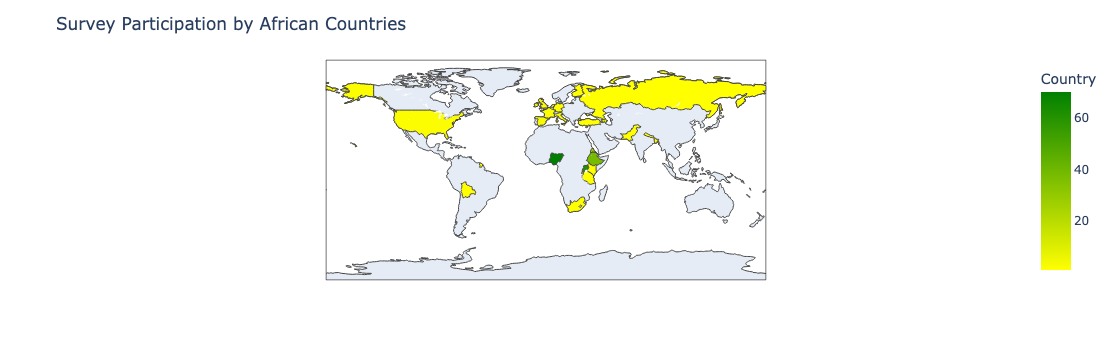

In [180]:
#what is the distribution of the countries of the participants

fig = px.choropleth(data, 
                    locations=data.index,
                    locationmode="country names",
                    color='Country',
                    #projection="natural earth",
                    color_continuous_scale=['yellow','green']
                    #"Viridis"
                   )


# Set the title and display the figure
fig.update_layout(
    title="Survey Participation by African Countries")
    

fig.show()

### Q1: Is the Score performance a function of age?

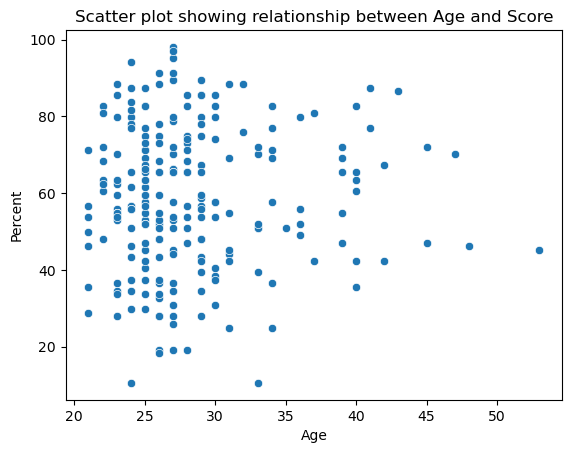

In [163]:
#plot a scatter plot to show the correlation between age and score
sns.scatterplot(x=df["Age"],y=df["Percent"])
plt.title("Scatter plot showing relationship between Age and Score");
#No, it is not

### Q2: What is the mean performance by Gender?

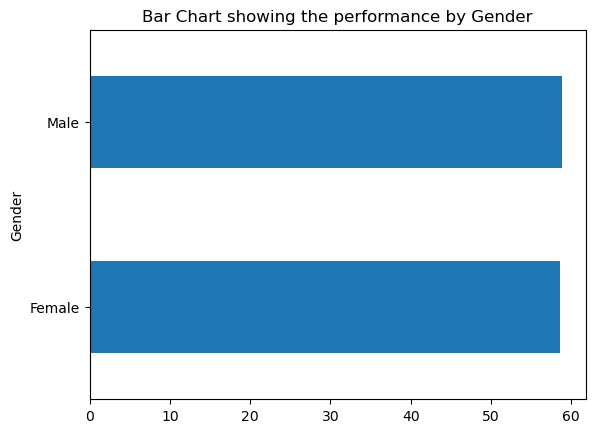

In [192]:
df.groupby("Gender")["Percent"].mean().plot.barh()
plt.title("Bar Chart showing the performance by Gender");

In [121]:
#The mean score by performance is approximately the same, we perform an independent T test to check if there is a 
# statistical difference

In [122]:
df_male=df[df["Gender"]=="Male"]
df_female=df[df["Gender"]=="Female"]

In [123]:
print(ttest_ind(df_male["Percent"],df_female["Percent"]))

Ttest_indResult(statistic=0.09330932526565265, pvalue=0.9257394077432912)


##### P_value > 0.05, therefore, there is no statistical difference between the mean score performance by Gender 

Text(0.5, 1.0, 'Mean score performance by Gender')

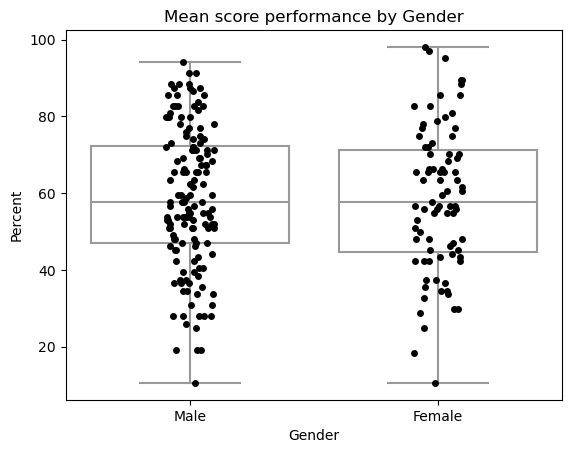

In [124]:
#visualizing the performance
sns.boxplot(x="Gender",y="Percent",data=df, color="white")
sns.stripplot(x="Gender",y="Percent",data=df, color="black")
plt.title("Mean score performance by Gender")

### Q3 What is the mean score performance by Field of study? (Life Science, Non Life Science)

In [125]:
df.groupby("Field")["Percent"].mean()

Field
Life science        62.956731
Non life science    49.228061
Name: Percent, dtype: float64

In [126]:
#The mean score by performance is higher for Life Sciences than Non life sciences
#we perform an independent T test to check if there is a statistical difference

In [127]:
df_lifesc=df[df["Field"]=="Life science"]
df_nonlifesc=df[df["Field"]=="Non life science"]

print(ttest_ind(df_lifesc["Percent"],df_nonlifesc["Percent"]))

Ttest_indResult(statistic=5.496943284337229, pvalue=1.0276084429068861e-07)


##### P_value<0.05, there is a significant difference between the knowledge of life science students and non_life science students, 
##### Life science students have more significant knowledge than non_life science students

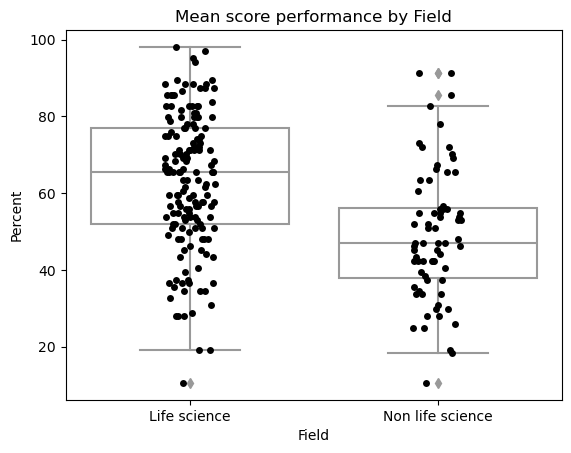

In [193]:
sns.boxplot(x="Field",y="Percent",data=df, color="white")
sns.stripplot(x="Field",y="Percent",data=df, color="black")
plt.title("Mean score performance by Field");

### Q4 Is there a difference in the performance by Level of study? (Bachelors, Post-graduates, Others)?

In [129]:
df.groupby("Education")["Percent"].mean()

Education
Bachelors        57.478632
Others           58.867521
Post-Graduate    61.510591
Name: Percent, dtype: float64

In [130]:
#we perform a one_way anova to compare multiple groups
df_bach=df[df["Education"]=="Bachelors"]
df_others=df[df["Education"]=="Others"]
df_postg=df[df["Education"]=="Post-Graduate"]

print(f_oneway(df_bach["Percent"],df_others['Percent'],df_postg["Percent"]))

F_onewayResult(statistic=1.1194757414390013, pvalue=0.32823848125172933)


##### p_value >0.05, hence there is no significant difference in the knowledge on the impact of climate change on zoonosis

Text(0.5, 1.0, 'Mean score performance by Level of Studies')

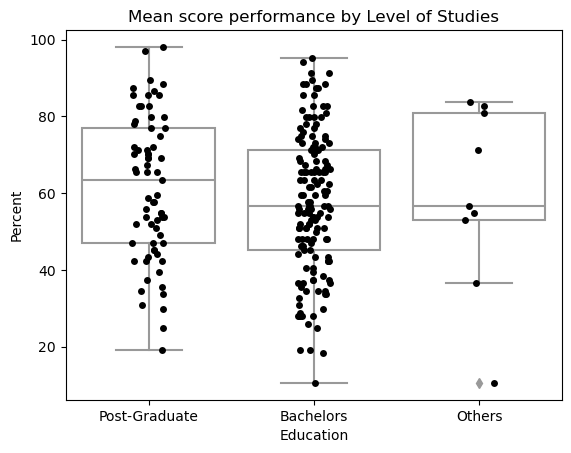

In [131]:
sns.boxplot(x="Education",y="Percent",data=df, color="white")
sns.stripplot(x="Education",y="Percent",data=df, color="black")
plt.title("Mean score performance by Level of Studies")

### Q5 What is the mean knowledge score by Continents, and top represented countries?

In [132]:
# we create a new column called continent to classify the continents
def continent(df):
    europe=["Azerbaijan","Finland","Germany","Ireland","Italy","Netherlands","Russia","Spain","Turkey","France"]
    africa=["Eritrea","Ethiopia","Kenya","Nigeria","South Africa","Tanzania","Uganda","Rwanda"]
    if df in europe:
        return ("Europe")
    elif df in africa:
        return ("Africa")
    else:
        return ("Others")
df["Continent"]=df["Country"].map(continent)

In [133]:
df.groupby("Continent")["Percent"].mean()

Continent
Africa    58.295063
Europe    58.916084
Others    69.350962
Name: Percent, dtype: float64

In [134]:
df_africa=df[df["Continent"]=="Africa"]
df_europe=df[df["Continent"]=="Europe"]
df_others=df[df["Continent"]=="Others"]

In [135]:
# performing a one way anova
print(f_oneway(df_africa["Percent"],df_europe["Percent"],df_others["Percent"]))

F_onewayResult(statistic=1.365590524135137, pvalue=0.2573093687005679)


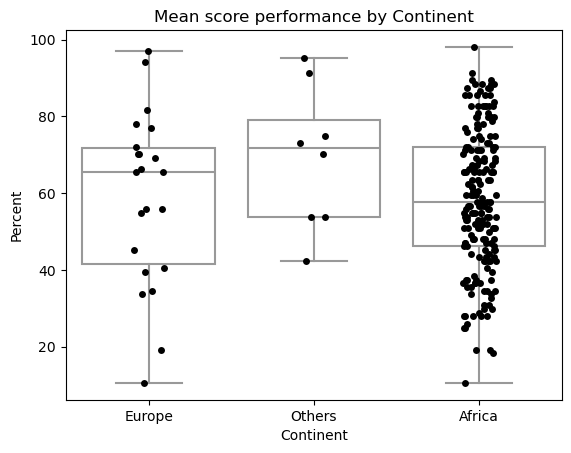

In [194]:
sns.boxplot(x="Continent",y="Percent",data=df, color="white")
sns.stripplot(x="Continent",y="Percent",data=df, color="black")
plt.title("Mean score performance by Continent");

##### P_value > 0.05, there is therefore no statistical significance in knowledge among the represented continents

In [137]:
# The top four represented countries are Nigeria, Ethiopia, Eritrea and Uganda
# we therefore perform a one way Anova to know if there is a difference in mean score among the countries

df["Country"].value_counts().head()

Nigeria       70
Uganda        61
Ethiopia      38
Eritrea       27
Azerbaijan     8
Name: Country, dtype: int64

In [138]:
df_top=df[(df["Country"]=="Nigeria")|(df["Country"]=="Uganda")|
          (df["Country"]=="Ethiopia")|(df["Country"]=="Eritrea")]

In [139]:
df_top.groupby("Country")["Percent"].mean()

Country
Eritrea     62.606838
Ethiopia    69.104251
Nigeria     57.527473
Uganda      50.583228
Name: Percent, dtype: float64

In [140]:
df_Nigeria=df_top[df_top["Country"]=="Nigeria"]
df_Ethiopia=df_top[df_top["Country"]=="Ethiopia"]
df_Eritrea=df_top[df_top["Country"]=="Eritrea"]
df_Uganda=df_top[df_top["Country"]=="Uganda"]

In [141]:
#we perform a one_way anova
print(f_oneway(df_Nigeria["Percent"], df_Ethiopia["Percent"], 
               df_Eritrea["Percent"], df_Uganda["Percent"]))

F_onewayResult(statistic=10.092932018964992, pvalue=3.3164125676352617e-06)


#### p_value <0.05, therefore there is a significant difference in knowledge among the four countries, we however do not know where 

#### the difference is, we therefore carry out a tukey HSD test to spot where the difference is 

In [142]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(endog=df_top["Percent"],groups=df_top["Country"],alpha=0.05))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
 Eritrea Ethiopia   6.4974 0.4212  -4.5032  17.498  False
 Eritrea  Nigeria  -5.0794 0.5453 -14.9806  4.8219  False
 Eritrea   Uganda -12.0236 0.0124 -22.1261 -1.9211   True
Ethiopia  Nigeria -11.5768 0.0044 -20.3833 -2.7702   True
Ethiopia   Uganda  -18.521    0.0 -27.5532 -9.4888   True
 Nigeria   Uganda  -6.9442 0.0903 -14.5994  0.7109  False
---------------------------------------------------------


In [143]:
#there is a significant difference between Eritrea and Uganda,
#Ethiopia and Nigeria
#Ethiopia and Uganda

Text(0.5, 1.0, 'Mean score performance by top country')

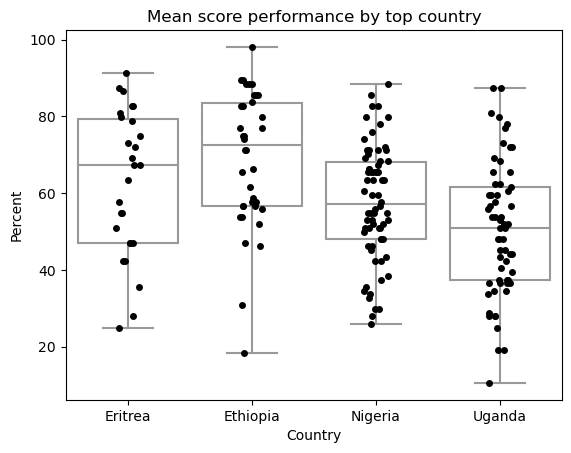

In [144]:
sns.boxplot(x="Country",y="Percent",data=df_top, color="white")
sns.stripplot(x="Country",y="Percent",data=df_top, color="black")
plt.title("Mean score performance by top country")

### Q6: What percentage of the participants are knowledgeable and not knowledgeable?


In [145]:
# we use a passmark of 80% to categorize as knowledgeable or not-knowledgeable
def knowledge (df):
    if df>=80:
        return ("Knowledgeable")
    else:
        return ('Not knowledgeable')
df["Knowledge"]=df["Percent"].map(knowledge)

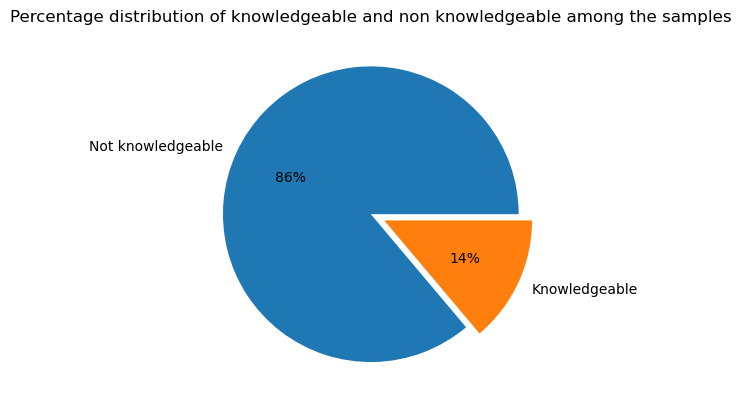

In [146]:
plt.pie(df["Knowledge"].value_counts(),labels=["Not knowledgeable","Knowledgeable"],
        autopct='%.0f%%',
        explode=[0,0.1])
plt.title("Percentage distribution of knowledgeable and non knowledgeable among the samples")
# displaying chart
plt.show()

### Q7: What is the distribution of the participants knowledge on some of the infectious diseases?

In [147]:
#we use the column 6 for this analysis
df["Q6"]

0      Ebola, SARS and MERS, Zika virus, COVID19, Avi...
1      Ebola, Nosocomial infections, SARS and MERS, Z...
2      Ebola, SARS and MERS, COVID19, Avian influenza...
3           SARS and MERS, COVID19, Avian influenza H5N1
4      Ebola, SARS and MERS, Zika virus, COVID19, Avi...
                             ...                        
226                                       Ebola, COVID19
227                                       Ebola, COVID19
228                 Ebola, COVID19, Avian influenza H5N1
229    Ebola, SARS and MERS, Zika virus, COVID19, Avi...
230            Ebola, SARS and MERS, Zika virus, COVID19
Name: Q6, Length: 231, dtype: object

In [148]:
diseases=df["Q6"].str.split(", ",expand=True)
#this returns a dataframe with all the words split separately
diseases

,0,1,2,3,4,5,6
0,Ebola,SARS and MERS,Zika virus,COVID19,Avian influenza H5N1,None,None
1,Ebola,Nosocomial infections,SARS and MERS,Zika virus,Barking fever,COVID19,Avian influenza H5N1
2,Ebola,SARS and MERS,COVID19,Avian influenza H5N1,None,None,None
3,SARS and MERS,COVID19,Avian influenza H5N1,None,None,None,None
4,Ebola,SARS and MERS,Zika virus,COVID19,Avian influenza H5N1,None,None
...,...,...,...,...,...,...,...
226,Ebola,COVID19,None,None,None,None,None
227,Ebola,COVID19,None,None,None,None,None
228,Ebola,COVID19,Avian influenza H5N1,None,None,None,None
229,Ebola,SARS and MERS,Zika virus,COVID19,Avian influenza H5N1,None,None


In [149]:
#merge them into one dataframe
diseases=pd.melt(diseases)
diseases

,variable,value
0,0,Ebola
1,0,Ebola
2,0,Ebola
3,0,SARS and MERS
4,0,Ebola
...,...,...
1612,6,None
1613,6,None
1614,6,None
1615,6,None


In [150]:
#we are interested in "value"
df_new=diseases["value"].value_counts().to_frame()
df_new

,value
COVID19,227
Ebola,222
Avian influenza H5N1,144
SARS and MERS,141
Zika virus,134
Nosocomial infections,29
Barking fever,19


In [151]:
#dropping barking fever because it was an error in the question
df_new.drop("Barking fever",inplace=True)

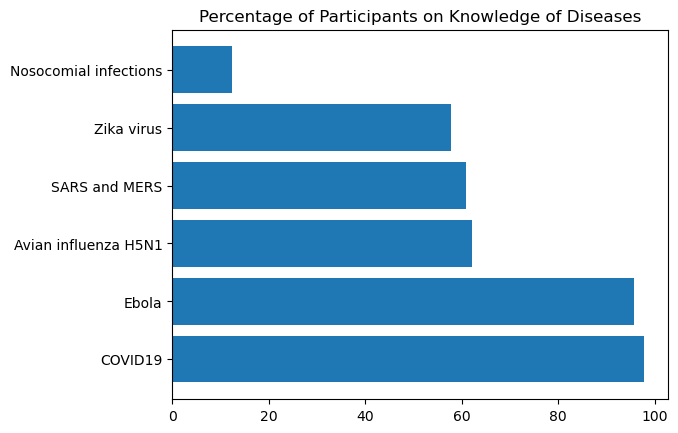

In [152]:
#we make the plot
a=df_new.index
b=(df_new["value"]/232)*100
plt.barh(a,b)
plt.title("Percentage of Participants on Knowledge of Diseases")
plt.show()

In [153]:
#almost 100% of the participants know about COVID19 and few knew about Nosocomial infections

### Q8: Which information source did the participants get information about the effect of climate change on zoonosis?

In [154]:
df_info=df["Q18"].str.split(', ',expand=True)
df_info.head()

,0,1,2,3,4,5,6
0,Internet and social media,Television programs and documentaries,Books and newspapers,Radio,Educational programs and conferences,None,None
1,Internet and social media,Books and newspapers,Family and friends,Educational programs and conferences,None,None,None
2,Internet and social media,Television programs and documentaries,Books and newspapers,Educational programs and conferences,None,None,None
3,Internet and social media,Educational programs and conferences,None,None,None,None,None
4,Internet and social media,Television programs and documentaries,Books and newspapers,Educational programs and conferences,None,None,None


In [155]:
df_info=pd.melt(df_info)

In [156]:
df_info=df_info["value"].value_counts()
df_info

Internet and social media                214
Television programs and documentaries    163
Educational programs and conferences     153
Books and newspapers                     119
Radio                                     84
Family and friends                        73
Others                                     7
I don't care about climate change          2
Name: value, dtype: int64

In [157]:
df_1=df_info.to_frame()

Text(0.5, 1.0, 'Percentage of Participants on Source of Information')

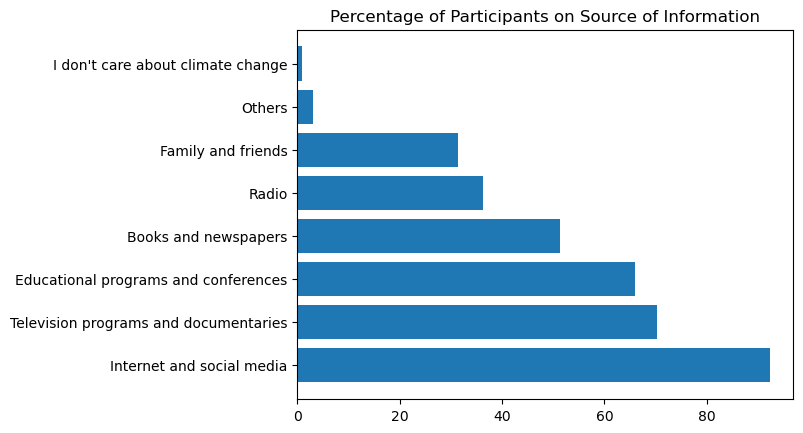

In [158]:
x=df_1.index
y=(df_1["value"]/232)*100

plt.barh(x,y)
plt.title("Percentage of Participants on Source of Information")

### CONCLUSION

* Participants from non-life science backgrounds have a lower level of knowledge on the impact of climate change on the emergence of infectious diseases than participants from life science backgrounds.

* No significant difference in knowledge among educational levels

* Significant difference between most represented countries
Possible causes: sociodemographic background, EID hotspots


* General public not fully aware of effect of climate change on emergence of infectious diseases

The 